In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

test = pd.read_csv('Latest.csv', low_memory = False)

all_mondays_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='W-MON')

def random_monday():
    return np.random.choice(all_mondays_2019)

test['date'] = test['date'].apply(lambda x: random_monday())
test = test.sort_values(by= 'date')
#display(test)
#display(test[test['store_number'] == 3013])
#test.to_csv('HierarchyTesting/HierarchyTest1.csv', index = False)


In [2]:
data1920 = pd.read_csv('pas_data_ward_level/PAS_ward_level_FY_19_20.csv', low_memory=False)
data1819 = pd.read_csv('pas_data_ward_level/PAS_ward_level_FY_18_19.csv', low_memory=False)
data1718 = pd.read_csv('pas_data_ward_level/PAS_ward_level_FY_17_18.csv', low_memory=False)
data1517 = pd.read_csv('pas_data_ward_level/PAS_ward_level_FY_15_17.csv', low_memory=False)
data = pd.concat([data1920, data1819, data1718, data1517], ignore_index=True)

#data.to_csv("1519CONCAT_FULL.csv")

#display(data)

In [3]:
def convert_to_standard_date(unique_timestamp):
    unix_timestamp = slope * unique_timestamp + intercept
    return datetime.datetime.utcfromtimestamp(unix_timestamp).strftime('%Y-%m-%d')

slope = 0.991036619270792
intercept = -12095274244.117882

# Apply the conversion function to the 'interview_date' column
data['converted_date'] = data['interview_date'].apply(convert_to_standard_date)
data['converted_date'] = pd.to_datetime(data['converted_date'])

data = data[data['converted_date'] < '2020-01-01']


pd.set_option('display.max_rows', 10)

#display(data)

data2 = data

C:\Users\20211424\AppData\Local\Temp\ipykernel_8324\1763960146.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['converted_date'] = data['interview_date'].apply(convert_to_standard_date)


In [4]:
pd.set_option('display.max_columns', None)

#list = ['converted_date','MONTH', 'ward', 'BOROUGHNEIGHBOURHOOD', 'SOA1', 'SOA2' ,'Q62TI', 'Q62C', 'Q62F', 'Q62TG', 'NQ135BD', 'Q62D', 'Q62E', 'Q62H', 'Q62TI', 'Q62TJ']
#list = ['converted_date', 'SOA1', 'SOA2', 'BOROUGHNEIGHBOURHOOD','Q62TI']

#data = data[list]
data.rename(columns={'SOA1': 'LSOA'}, inplace=True)
data.rename(columns={'SOA2': 'MSOA'}, inplace=True)

q_conversion = {'Strongly agree': 1, 'Tend to agree': 2, 'Neither agree nor disagree': 3,
'Tend to disagree': 4, 'Strongly disagree': 5, "Don't know": 97,'Refused': 98, 'Not Asked': 99}

# #Mapping of question answers to values
data['Q62TI'] = data['Q62TI'].map(q_conversion)
data['Q62C'] = data['Q62C'].map(q_conversion)

#Changing formatting of Borough names
data['BOROUGH'] = data['BOROUGHNEIGHBOURHOOD'].str.split(' - ').str[0]
data.drop(columns=['BOROUGHNEIGHBOURHOOD'], inplace=True)

#data = data.dropna(axis=0)
data.to_csv("1519CONCAT.csv")
display(data)

#NEW ADDITION
numeric_columns = data.select_dtypes(include=[np.number]).columns
averaged_data = data.groupby(['LSOA', 'converted_date'])[numeric_columns].mean().reset_index()
data = averaged_data.merge(data[['LSOA', 'converted_date', 'MSOA', 'BOROUGH']], on=['LSOA', 'converted_date'], how='left')

#data.sort_values(by='converted_date', inplace=True)
data['id'] = range(1, len(data) + 1)

unique_values = data['Q62TI'].unique()
#print("Unique values in Q62TI column:", unique_values)
data['Q62TI'] = data['Q62TI'].astype(int)

#data = data[data['BOROUGH'] == 'Barnet']

borough_names = data['BOROUGH'].unique()
boroughs_to_remove = [borough_names[32], borough_names[33], borough_names[34], borough_names[35]]
data = data[~data['BOROUGH'].isin(boroughs_to_remove)]

data['MSOA'] = data['MSOA'].str.strip()
data['LSOA'] = data['LSOA'].str.strip()

#data = data.head(1000)
#data.to_csv('Q62TI_timeseries.csv')

display(data)
#print(data.groupby('BOROUGH')['MSOA'].unique())

# data['Q62C'] = data['Q62C'].map(q_conversion)
# data['Q62F'] = data['Q62F'].map(q_conversion)
# data['Q62TG'] = data['Q62TG'].map(q_conversion)
# data['NQ135BD'] = data['NQ135BD'].map(q_conversion)
# data['Q62D'] = data['Q62D'].map(q_conversion)
# data['Q62E'] = data['Q62E'].map(q_conversion)
# data['Q62H'] = data['Q62H'].map(q_conversion)
# data['Q62TI'] = data['Q62TI'].map(q_conversion)
# data['Q62TJ'] = data['Q62TJ'].map(q_conversion)


C:\Users\20211424\AppData\Local\Temp\ipykernel_8324\106067245.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['BOROUGH'] = data['BOROUGHNEIGHBOURHOOD'].str.split(' - ').str[0]


,Unnamed: 0,MONTH,FinancialYear,ward,ward_n,WARD_5,WARD_6,WARD_7,ward_unique,WARD_0,WARD_1,WARD_2,WARD_3,WARD_4,LSOA,MSOA,BOROU0,BOROU1,BOROU2,BOROU3,BOROU4,BOROU5,BOROU6,BOROU7,BOROUGHNEIGHBOURHOODCODED,quarter,Quarter1.1,C2,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,XQ3B,NQ7B,XQ8,XQ9A,XQ9B,Q13,Q14A,Q14B,Q14C,Q14D,Q14E,Q15,Q16A,Q16B,Q16C,Q16D,Q16E,ZQ10A,ZQ10B,ZQ10C,ZQ10D,ZQ10E,ZQ10F,ZQ10H,ZQ10I,ZQ10J,ZNQ10A,ZNQ10BA,ZNQ10BB,ZNQ10BC,ZNQ10BD,ZNQ10BE,ZNQ10BF,NQ21,Q21,Q54A,Q54B,Q54C,Q54D,Q54E,NQ57AA,NQ57AB,NQ57AC,NQ57AD,NQ57AE,NNQ27C,NNQ27E,Q37,Q38A,Q38B,Q38C,Q38D,Q38E,Q39A_2,Q39BA,Q39BB,Q39BC,Q39BD,Q39BE,NQ43,NQ43AA,NQ43AB,NQ43AC,NQ43AD,NQ43AE,NQ44A,NQ44BA,NQ44BB,NQ44BC,NQ44BD,NQ44BE,NQ46A,NQ46BA,NQ46BB,NQ46BC,NQ46BD,NQ46BE,NQ47A,NQ47BA,NQ47BB,NQ47BC,NQ47BD,NQ47BE,NQ48A,NQ49B,NQ49C,NQ45A,NQ45BA,NQ45BB,NQ45BC,NQ45BD,NQ45BE,XQ57A,XQ57B,XQ57C,XQ57EA,XQ57EB,XQ57EC,XQ57ED,XQ57EE,XQ57EF,Q58,Q59,XQ59A,XQ59B,XQ59C,XQ59D,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,XQ81,Q79A,Q79B,Q79C,Q79D,NQ79D,Q79E,Q79F,Q79G,Q79H,Q79I,Q79J,NQ79A,NQ79ABA,NQ79ABB,NQ79ABC,NQ79ABD,NQ79ABE,NQ79BB,NQ79BC,NQ79BD,NQ79BI,SQ79B,SQ79C,SQ79DA,SQ79DB,SQ79DC,SQ79DD,SQ79DE,SQ79DF,SQ79E,SQ79F,SQ79EA,SQ79EB,SQ79ED,SQ79EC,SQ79EE,SQ79EF,SQ79EG,SQ79EH,SQ79EI,SQ79EJ,SQ79EK,SQ79EL,SQ79EM,SQ79EN,SQ79EO,SQ79EP,XQ122A,XQ122B,BQ90A,XBQ90A,BQ90B,BQ90C,BQ90EA,BQ90EB,BQ90EC,BQ90ED,BQ90EE,BQ90EF,BQ90EG,BQ90EH,BQ90D,BQ90DA,BQ90F,SQ109CAA,SQ109CAB,SQ109CAC,SQ109CAD,SQ109CAE,SQ109CAF,XQ192,Q122,Q124,Q125,Q106,XQ106B,XQ106C,XQ106D,XQ119A,XQ119B,ZQ110,XQ114B,XQ114C,ZNQ119,ZPQ119,A120,A121,XQ122,XQ123,XQ128A,XQ128B,XQ128C,XQ128D,Q131,Q132B,Q132F,Q132G,Q132GG,Q132I,Q132J,Q132K,Q132L,Q132M,Q132N,Q132NN,Q132O,Q132P,Q132S,Q132V,Q132W,Q132X,Q132Y,Q132Z,Q132AA,Q132AB,Q132AC,Q132AD,Q132AE,Q132AG,Q132AH,Q132AI,Q132AJ,Q132AK,Q132AL,Q132AM,SQ132B,SQ132F,SQ132G,SQ132GG,SQ132I,SQ132J,SQ132K,SQ132L,SQ132M,SQ132N,SQ132NN,SQ132O,SQ132P,SQ132S,SQ132V,SQ132W,SQ132X,SQ132Y,SQ132Z,SQ132AA,SQ132AB,SQ132AC,SQ132AD,SQ132AE,SQ132AG,SQ132AH,SQ132AI,SQ132AJ,SQ132AK,SQ132AL,SQ132AM,SQ132A_2,NQ133,NQ133A,Q133,PQ135AA,PQ135AB,PQ135AC,PQ135AD,PQ135AE,PQ135AF,PQ135AG,PQ135AH,PQ135AI,PQ135AJ,PQ135AK,PQ135AL,PQ135AM,PQ135AN,PQ135AO,PQ135AP,PQ135AQ,PQ135AR,PQ135AS,PQ135AT,PQ135AU,PQ135AV,PQ135AW,PQ135AX,PQ135AY,PQ135AZ,PQ135AAA,PQ135AAB,PQ135AAC,PQ135AAD,PQ135AAE,PQ135AAF,PQ135AAG,PQ135AAH,PQ135AAI,PQ135AAJ,PQ135AAK,PQ135AAL,PQ135AAM,PQ135AAN,PQ135AAO,PQ135AAP,PQ135AAQ,PQ135AAR,PQ135AAS,PQ135AAT,PQ135AAU,PQ135AAV,PQ135AAW,PQ135AAX,PQ135AAY,NQ135A_newA,NQ135A_newB,NQ135A_newC,NQ135A_newD,NQ135A_newE,NQ135A_newF,NQ135A_newG,NQ135A_newH,NQ135A_newI,NQ135A_newJ,NQ135A_newK,NQ135A_newL,NQ135A_newM,NQ135A_newN,NQ135A_newO,NQ135A_newP,NQ135A_newQ,NQ135A_newR,NQ135A_newS,NQ135A_newT,NQ135A_newU,NQ135A_newV,NQ135A_newW,NQ135A_newX,NQ135A_newY,NQ135A_newZ,NQ135A_newAA,NQ135A_newAB,NQ135A_newAC,NQ135A_newAD,NQ135A_newAE,NQ135A_newAF,NQ135A_newAG,NQ135A_newAH,NQ135A_newAI,NQ135A_newAJ,NQ135A_newAK,NQ135A_newAL,NQ135A_newAM,NQ135A_newAN,NQ135A_newAO,NQ135A_newAP,NQ135A_newAQ,NQ135A_newAR,NQ135A_newAS,NQ135A_newAT,NQ135A_newAU,NQ135A_newAV,NQ135A_newAW,NQ135A_newAX,NQ135A_newAY,NNQ135A_newA,NNQ135A_newB,NNQ135A_newC,NPQ135A,NPQ135B,NPQ135C,NQ135BB,NQ135BC,NQ135BD,NQ135BE,NQ135BF,NQ135BH,NQ135BK,NQ135BL,NQ135BM,NQ135BN,NQ135BI,XQ135r,Q136r,Q139r,SQ80C,SQ80D,Q9,Q141,Q142F,NQ143,Q144,Q145,NQ146,NQ147r,NQ155r,Q148,NQ149r,Q150r,WT_Q53,WT_Q53_B,WT_Q53_E,WT_Q54,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Q57,WT_Q57_B,WT_Q57_E,WT_Q58,WT_Q58_B,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,interview_date,XQ57D,XQ21A,XQ21E,XQ82A,XQ82B,WT_Q49,WT_Q49_B,WT_Q49_E,WT_Q50,WT_Q50_B,WT_Q50_E,WT_Q51,WT_Q51_B,WT_Q51_E,WT_Q52,WT_Q52_B,WT_Q52_E,XQ21B,XQ21C,XQ21D,XQ81A,XQ81B,NQ80,NQ80H,NQ80A,NQ80BA,NQ80BB,NQ80BC,NQ80BD,NQ80BE,NQ80C,NQ80D,NQ1,NQ2A,NQ2B,NQ2C,NQ2D,NQ2E,NQ2F,NQ2G,NQ2H,NQ2I,Q1D,Q126DA,Q126DB,Q126DC,NQ7A,Q10A,Q10B,Q10C,Q10D,Q1

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

,nearest_monday,LSOA,MSOA,BOROUGH,Q62C
0,2015-04-20,E01000014,E02000014,Barking and Dagenham,4.000000
1,2015-04-20,E01000079,E02000010,Barking and Dagenham,2.000000
2,2015-04-20,E01000126,E02000049,Barnet,1.000000
3,2015-04-20,E01000128,E02000047,Barnet,NaN
4,2015-04-20,E01000129,E02000047,Barnet,4.500000
...,...,...,...,...,...
32213,2019-12-23,E01004576 ...,E02000935 ...,Wandsworth,2.500000
32214,2019-12-23,E01004752 ...,E02000981 ...,Westminster,4.000000
32215,2019-12-23,E01004753 ...,E02000981 ...,Westminster,2.333333
32216,2019-12-23,E01032623 ...,E02006836 ...,Sutton,2.000000


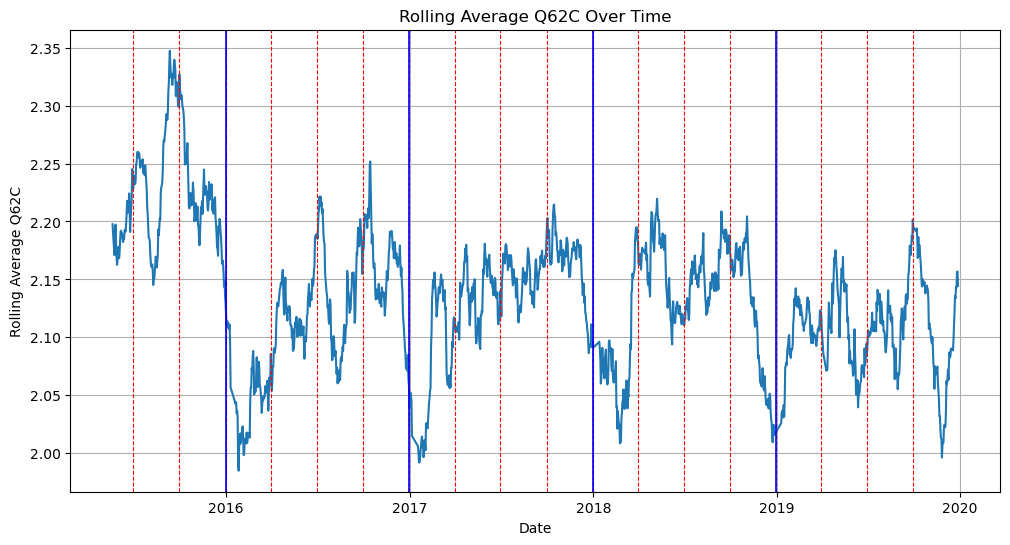

In [5]:
#a = pd.read_csv('Q62TI_timeseries.csv', low_memory = False)
#display(a)
data = data.sort_values(by='converted_date')
data['converted_date'] = pd.to_datetime(data['converted_date'])
data['nearest_monday'] = data['converted_date'] - pd.to_timedelta(data['converted_date'].dt.dayofweek, unit='D')

#grouped_data = data.groupby(['nearest_monday', 'LSOA', 'MSOA', 'BOROUGH']).agg({'Q62TI': 'mean'})
grouped_data = data.groupby(['nearest_monday', 'LSOA', 'MSOA', 'BOROUGH']).agg({'Q62C': 'mean'})
grouped_data.reset_index(inplace=True)

grouped_data2 = data.groupby(['nearest_monday', 'LSOA', 'MSOA', 'BOROUGH']).agg({'Q62TI': 'mean'})
grouped_data2.reset_index(inplace=True)

display(grouped_data)

grouped_data.to_csv('grouped_data.csv')

average_values = data.groupby('converted_date')['Q62C'].mean()
average_values_df = average_values.reset_index()

average_values = data.groupby('converted_date')['Q62C'].mean()
average_values_df = average_values.reset_index()

plt.figure(figsize=(12, 6))

rolling_average = average_values_df['Q62C'].rolling(window=30).mean()
plt.plot(average_values_df['converted_date'], rolling_average)
plt.xlabel('Date')
plt.ylabel('Rolling Average Q62C')
plt.title('Rolling Average Q62C Over Time')
plt.grid(True)

# Adding vertical dashed lines for each quarter
quarters = pd.date_range(start=average_values_df['converted_date'].min(), 
                         end=average_values_df['converted_date'].max(), 
                         freq='Q')

for quarter in quarters:
    plt.axvline(x=quarter, color='red', linestyle='--', lw=0.8)

# Adding vertical solid lines for each year
years = pd.date_range(start=average_values_df['converted_date'].min(), 
                      end=average_values_df['converted_date'].max(), 
                      freq='Y')

for year in years:
    plt.axvline(x=year, color='blue', linestyle='-', lw=1.2)

plt.show()

In [6]:
data2 = data2[['Q62TI', 'Q62C', 'Q62F', 'Q62TG', 'NQ135BD', 'Q62D', 'Q62E', 'Q62H', 'Q62TI', 'Q62TJ']]

q_conversion = {'Strongly agree': 1, 'Tend to agree': 2, 'Neither agree nor disagree': 3,
'Tend to disagree': 4, 'Strongly disagree': 5, "Don't know": 97,'Refused': 98, 'Not Asked': 99}

data2['Q62TI'] = data2['Q62TI'].map(q_conversion)
data2['Q62C'] = data2['Q62C'].map(q_conversion)
data2['Q62F'] = data2['Q62F'].map(q_conversion)
data2['Q62TG'] = data2['Q62TG'].map(q_conversion)
data2['NQ135BD'] = data2['NQ135BD'].map(q_conversion)
data2['Q62D'] = data2['Q62D'].map(q_conversion)
data2['Q62E'] = data2['Q62E'].map(q_conversion)
data2['Q62H'] = data2['Q62H'].map(q_conversion)
data2['Q62TI'] = data2['Q62TI'].map(q_conversion)
data2['Q62TJ'] = data2['Q62TJ'].map(q_conversion)


data2.replace([98, 99], np.nan, inplace=True)
data2.interpolate(method='linear', inplace=True)
data2.fillna(method='bfill', inplace=True)  # Backward fill

display(data2)


TypeError: the first argument must be callable

In [143]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression, LassoCV
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample DataFrame
# # data2 = pd.read_csv('your_dataset.csv') # Load your dataset

# # Step 1: Correlation Analysis
# correlation_matrix = data2.corr()

# # Plotting the correlation matrix
# plt.figure(figsize=(14, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

# # Step 2: Feature Selection using Recursive Feature Elimination (RFE)
# # Target is the column we want to predict, e.g., 'target_column'
# target_column = 'Q62TI'  # Replace with your actual target column
# X = data2.drop(columns=[target_column])
# y = data2[target_column]

# # Using Linear Regression for RFE
# model = LinearRegression()
# rfe = RFE(model, n_features_to_select=1)
# fit = rfe.fit(X, y)

# # Displaying feature rankings
# rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
# rfe_ranking.sort_values(by='Ranking', inplace=True)
# print(rfe_ranking)

# # Step 3: Regression Analysis with LassoCV for feature importance
# lasso = LassoCV(cv=5)
# lasso.fit(X, y)

# lasso_coef = pd.Series(lasso.coef_, index=X.columns)
# important_features = lasso_coef[lasso_coef != 0]
# print("Important features selected by Lasso:", important_features)

# # Step 3: Regression Analysis with RandomForest for feature importance
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)

# rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
# important_rf_features = rf_importance.sort_values(ascending=False)
# print("Important features selected by Random Forest:", important_rf_features)

print(data['BOROUGH'].unique())


['Wandsworth' 'Newham' 'Barnet' 'Havering' 'Barking and Dagenham'
 'Haringey' 'Hounslow' 'Sutton' 'Croydon' 'Hammersmith and Fulham'
 'Camden' 'Enfield' 'Greenwich' 'Bromley' 'Richmond upon Thames' 'Harrow'
 'Brent' 'Hackney' 'Islington' 'Redbridge' 'Ealing' 'Waltham Forest'
 'Westminster' 'Hillingdon' 'Lewisham' 'Bexley' 'Southwark'
 'Kensington and Chelsea' '#N/A                                      '
 '                                                                                                                                                                                                                                                               '
 '#N/A                                                                                                                                                                                                                                                           '
 '                                          ']


,nearest_monday,Q62C
0,2019-01-07,2.141813
1,2019-01-14,2.101474
2,2019-01-21,2.145581
3,2019-01-28,2.094186
4,2019-02-04,2.110632
...,...,...
46,2019-11-25,2.103552
47,2019-12-02,2.156229
48,2019-12-09,2.091002
49,2019-12-16,2.167181


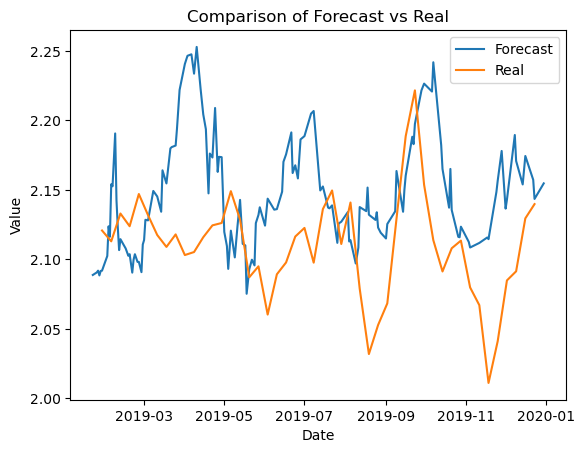

In [7]:
chosen_borough = 'Newham'
chosen_boroughs = ['Camden', 'Haringey', 'Islington', 'Westminster', 'Hackney', 'Waltham Forest' ]
# chosen_boroughs = ['Wandsworth', 'Newham', 'Barnet', 'Havering', 'Barking and Dagenham',
#  'Haringey', 'Hounslow', 'Sutton' ,'Croydon' ,'Hammersmith and Fulham',
#  'Camden', 'Enfield', 'Greenwich', 'Bromley' ,'Richmond upon Thames' ,'Harrow'
#  'Brent', 'Hackney' 'Islington', 'Redbridge' 'Ealing', 'Waltham Forest'
#  'Westminster', 'Hillingdon' ,'Lewisham' ,'Bexley', 'Southwark',
#  'Kensington and Chelsea']

chosen_boroughs = data['BOROUGH'].unique()

#data.to_csv("datatemp.csv")

#Q62TI_Predictions = pd.read_csv('Mon18.csv', low_memory = False)
Q62TI_Predictions = pd.read_csv('Fri14.csv', low_memory = False)

Q62TI_Predictions = Q62TI_Predictions[Q62TI_Predictions['forecast_timestamp'] < '2020-01-01']
Q62TI_Predictions = Q62TI_Predictions[Q62TI_Predictions['forecast_timestamp'] > '2019-01-01']

Q62TI_Wandsworth = Q62TI_Predictions[Q62TI_Predictions['BOROUGH'].isin(chosen_boroughs)]
average_forecast = Q62TI_Wandsworth.groupby('forecast_timestamp')['forecast_value'].mean()
average_forecast_df = average_forecast.reset_index()
Q62TI_Wandsworth['forecast_timestamp'] = pd.to_datetime(Q62TI_Wandsworth['forecast_timestamp'])
average_forecast_weekly = Q62TI_Wandsworth.resample('W-Mon', on='forecast_timestamp')['forecast_value'].mean()
average_forecast_weekly_df = average_forecast_weekly.reset_index()

avgg = Q62TI_Wandsworth.groupby('forecast_timestamp').agg({'forecast_value': 'mean'})

avgg.reset_index(inplace=True)

data2019 = grouped_data[grouped_data['nearest_monday'] > '2019-01-01']
data2019 = data2019[data2019['BOROUGH'].isin(chosen_boroughs)]

data2019['nearest_monday'] = pd.to_datetime(data2019['nearest_monday'])
average_forecast_weekly_real = data2019.resample('W-Mon', on='nearest_monday')['Q62C'].mean()
average_forecast_weekly_df_real = average_forecast_weekly_real.reset_index()
average_forecast_weekly_df['forecast_timestamp'] = pd.to_datetime(average_forecast_weekly_df['forecast_timestamp']).dt.date


overall_avg = avgg['forecast_value'].mean()
avgg['rolling_mean'] = avgg['forecast_value'].rolling(window=13).mean()
avgg['inter']  = avgg['rolling_mean']


for i in range(len(avgg['inter'])):
    a = avgg.loc[i, 'inter']
    if avgg.loc[i, 'inter'] > overall_avg:
       avgg.loc[i, 'inter'] = a - (abs(overall_avg - a) * 0.2)
    else:
       avgg.loc[i, 'inter'] = a + (abs(overall_avg - a) * 0.5)
        
plt.plot(avgg['forecast_timestamp'], avgg['inter'], label='Forecast')
plt.plot(average_forecast_weekly_df_real['nearest_monday'], average_forecast_weekly_df_real['Q62C'].rolling(window=4).mean(), label='Real')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Forecast vs Real')
plt.legend()
#plt.show()

display(average_forecast_weekly_df_real)

#average_forecast_weekly_df_real.to_csv("

In [15]:
#avgg['forecast_value'].rolling(window=12).mean() - 0.8

#average_forecast_weekly_df_real['Q62TI'].rolling(window=4).mean()
avgg2 = avgg
avgg2['new'] = avgg['forecast_value'].rolling(window=12).mean() - 0.8

pd.set_option('display.max_rows', None)
#display(avgg2)

#display(average_forecast_weekly_df_real)

NameError: name 'avgg' is not defined

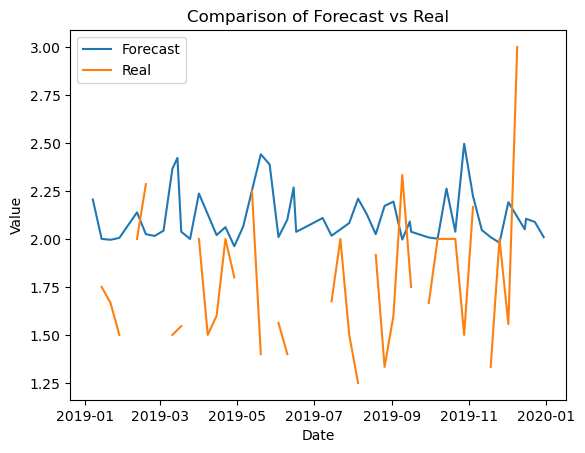

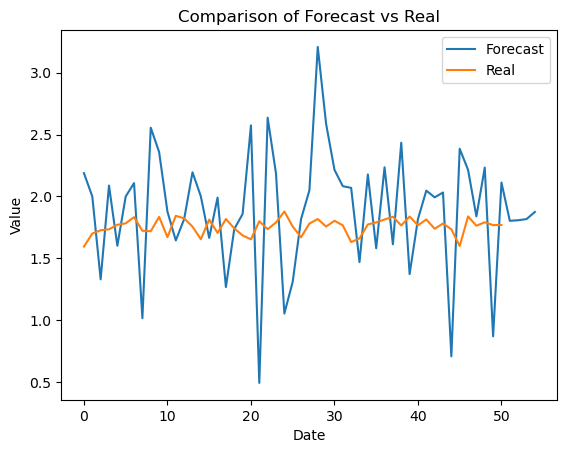

In [49]:
plt.plot(avgg.index, avgg['forecast_value'], label='Forecast')
#plt.plot(average_forecast_weekly_df.index, average_forecast_weekly_df['forecast_value'], label='Forecast')

# Plotting the data from the second DataFrame
plt.plot(average_forecast_weekly_df_real.index, average_forecast_weekly_df_real['Q62TI'], label='Real')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Forecast vs Real')
plt.legend()

# Display the plot
plt.show()

In [14]:
Q62TI_Predictions = pd.read_csv('Q62TI_Predictions3.csv', low_memory = False)
Q62TI_Predictions = Q62TI_Predictions[Q62TI_Predictions['forecast_timestamp'] < '2020-01-01']
Q62TI_Predictions = Q62TI_Predictions[Q62TI_Predictions['forecast_timestamp'] > '2019-01-01']

#pd.set_option('display.max_rows', None)
#display(Q62TI_Predictions[Q62TI_Predictions['BOROUGH'] == 'Barking and Dagenham'])

# Q = Q62TI_Predictions
# Q62TI_Wandsworth = Q[ Q['BOROUGH'] == 'Wandsworth']
# average_forecast = Q62TI_Wandsworth.groupby('forecast_timestamp')['forecast_value'].mean()
# display(average_forecast)
# average_forecast_df = average_forecast.reset_index()
# Q62TI_Wandsworth['forecast_timestamp'] = pd.to_datetime(Q62TI_Wandsworth['forecast_timestamp'])
# average_forecast_weekly = Q62TI_Wandsworth.resample('W-Mon', on='forecast_timestamp')['forecast_value'].mean()
# average_forecast_weekly_df = average_forecast_weekly.reset_index()

#display(average_forecast_weekly_df)

#display(data)

In [304]:
pd.set_option('display.max_rows', 10)
averagedData = data.groupby(['BOROUGH', 'MSOA', 'LSOA', 'converted_date'])['Q62TI'].mean().reset_index()
display(averagedData)

averagedData.to_csv('avgDataQ62TI.csv')

,BOROUGH,MSOA,LSOA,converted_date,Q62TI
0,,E02000016,E01000010,2018-12-03,2.0
1,,E02000027,E01000291,2019-03-12,2.0
2,,E02000034,E01000320,2019-02-02,2.0
3,,E02000053,E01033572,2018-07-12,1.0
4,,E02000069,E01000406,2018-10-13,2.0
...,...,...,...,...,...
30955,Westminster,E02000983,E01004741,2017-08-24,2.0
30956,Westminster,E02000983,E01004741,2018-10-28,1.0
30957,Westminster,E02000983,E01004741,2019-08-19,2.0
30958,Westminster,E02000983,E01004741,2019-10-21,2.0
